# 3D MNIST

https://medium.com/shashwats-blog/3d-mnist-b922a3d07334

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import animation
# import seaborn as sns

import h5py
import os, sys
sys.path.append('data/')

from voxelgrid import VoxelGrid
from plot3D import *

In [9]:
%matplotlib inline
# plt.rcParams['image.interpolation'] = None
plt.rcParams['image.cmap'] = 'gray'

In [4]:
with h5py.File('./3d-mnist-kaggle/train_point_clouds.h5', 'r') as f:
  # Reading digit at zeroth index    
  a = f["0"]   
  # Storing group contents of digit a
  digit = (a["img"][:], a["points"][:], a.attrs["label"])

In [5]:
digits = []

with h5py.File("./3d-mnist-kaggle/train_point_clouds.h5", 'r') as h5:
    for i in range(15):
        d = h5[str(i)]
        digits.append((d["img"][:],d["points"][:],d.attrs["label"]))

In [6]:
len(digits)

15

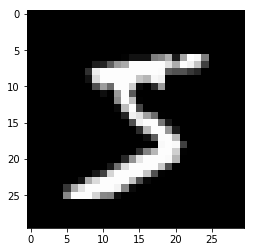

In [10]:
plt.imshow(digit[0])

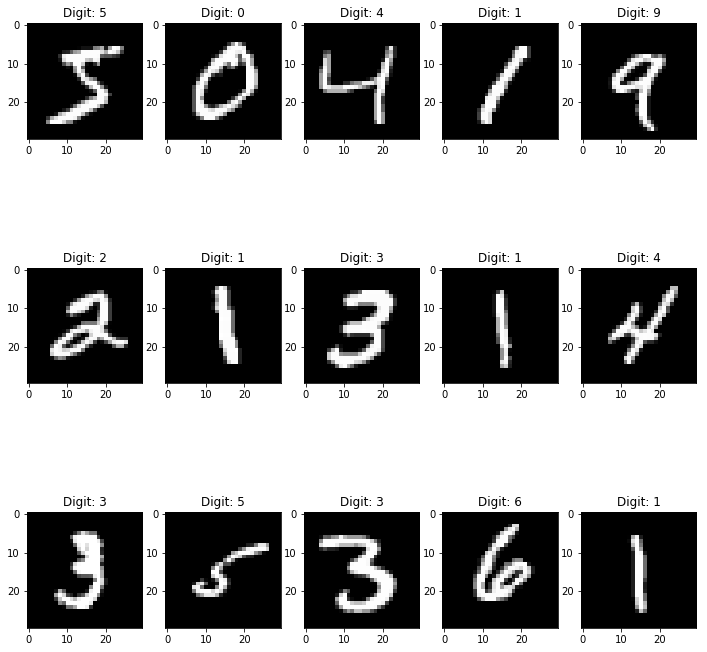

In [11]:
# Plot some examples from original 2D-MNIST
fig, axs = plt.subplots(3,5, figsize=(12, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

for ax, d in zip(axs.ravel(), digits):
    ax.imshow(d[0][:])
    ax.set_title("Digit: " + str(d[2]))

In [14]:
digit[0].shape, digit[1].shape

((30, 30), (25700, 3))

In [30]:
voxel_grid = VoxelGrid(digit[1], x_y_z = [16, 16, 16])

def count_plot(array):
    cm = plt.cm.get_cmap('gist_rainbow')
    n, bins, patches = plt.hist(array, bins=64)

    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # scale values to interval [0,1]
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.show()


In [31]:
voxel_grid.structure[:, -1]

array([3946, 3946, 3946, ...,  106,  106,  106])

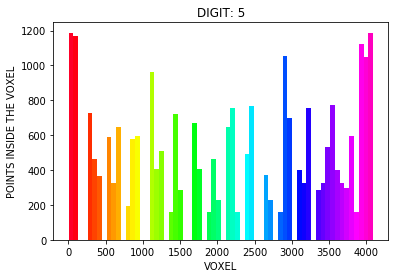

In [32]:
# Get the count of points within each voxel.
plt.title("DIGIT: " + str(digits[0][-1]))
plt.xlabel("VOXEL")
plt.ylabel("POINTS INSIDE THE VOXEL")
count_plot(voxel_grid.structure[:,-1])    


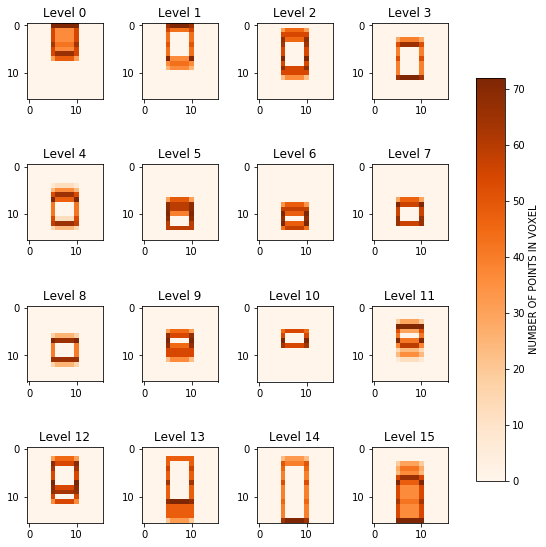

In [33]:
voxels = []
for d in digits:
    voxels.append(VoxelGrid(d[1], x_y_z=[16,16,16]))
    
# Visualizing the Voxel Grid sliced around the z-axis.
voxels[0].plot()
plt.show()


In [34]:
# Save Voxel Grid Structure as the scalar field of Point Cloud.
cloud_vis = np.concatenate((digit[1], voxel_grid.structure), axis=1)
np.savetxt('Cloud Visualization - ' + str(digit[2]) + '.txt', cloud_vis)

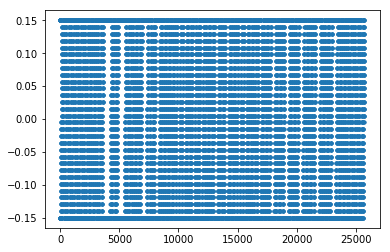

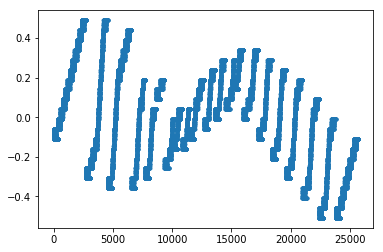

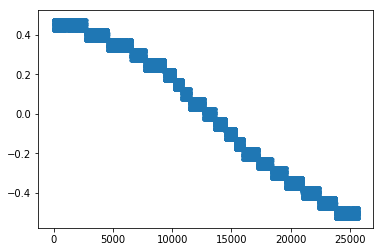

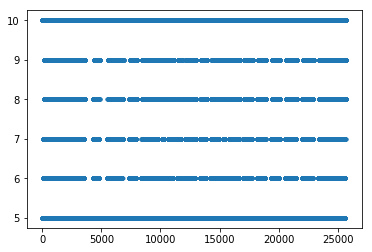

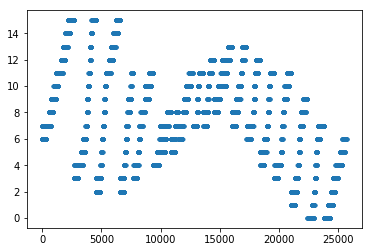

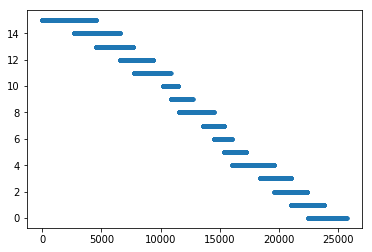

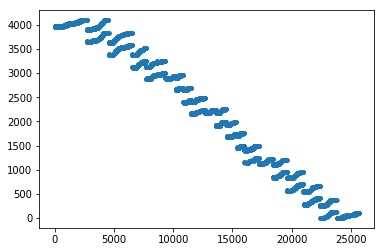

In [46]:
for i in range(cloud_vis.shape[1]):
    plt.figure()
    plt.plot(cloud_vis[:,i], '.')

# Train Classifier

In [48]:
with h5py.File("./3d-mnist-kaggle/full_dataset_vectors.h5", 'r') as h5:
    X_train, y_train = h5["X_train"][:], h5["y_train"][:]
    X_test, y_test = h5["X_test"][:], h5["y_test"][:]
    

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10000, 4096), (10000,), (2000, 4096), (2000,))

In [56]:
np.max(X_train[0])

1.0

In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier

reg = LogisticRegression()
reg.fit(X_train,y_train)
print("LR-Accuracy: ", reg.score(X_test,y_test))

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("DT-Accuracy: ", dt.score(X_test,y_test))

svm = LinearSVC()
svm.fit(X_train,y_train)
print("SVM-Accuracy: ", svm.score(X_test,y_test))

knn = KNN()
knn.fit(X_train,y_train)
print("KNN-Accuracy: ", knn.score(X_test,y_test))

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
print("RF-Accuracy: ", rf.score(X_test,y_test))

LR-Accuracy:  0.582
DT-Accuracy:  0.4905
SVM-Accuracy:  0.558
KNN-Accuracy:  0.5905
RF-Accuracy:  0.68
